[![View notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolot_et_al_2013/fig_1.ipynb) 
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Bolot_et_al_2013/fig_1.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Bolot_et_al_2013/fig_1.ipynb)

### based on Fig. 1 from Bolot et al. 2013 (Atmos. Chem. Phys.) "_Modelling and interpreting the isotopic composition of water vapour in convective updrafts_" (http://doi.org/10.5194/acp-13-7903-2013)

In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from open_atmos_jupyter_utils import show_plot
from matplotlib import pyplot
from PySDM import Formulae
import numpy as np

In [3]:
formulae = Formulae(isotope_equilibrium_fractionation_factors="MerlivatAndNief1967+Majoube1970+Majoube1971")
alphas = formulae.isotope_equilibrium_fractionation_factors
const = formulae.constants

In [4]:
XRANGE = (-120, 20)
YRANGES = {
    "2H": (1, 1.9),
    "18O": (1, 1.08)
}
TITLES = {
    "2H": "D/H",
    "18O": "$^{18}O/^{16}O$"
}
COLORS = {
    "ice": "green",
    "liquid water": "blue"
}
N_POINTS = 64

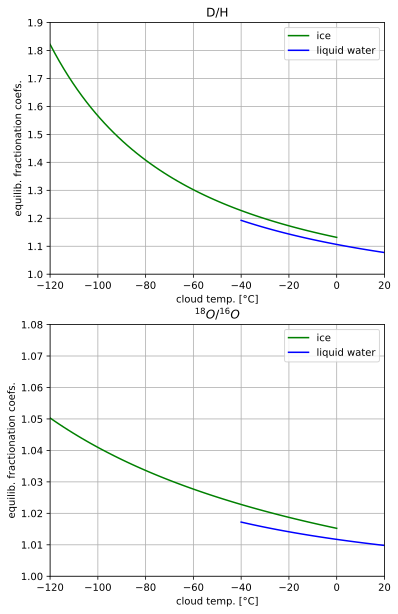

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [5]:
fig, axs = pyplot.subplots(2, 1, figsize=(6,10))
for i, isotopologue in enumerate(("2H", "18O")):
    for phase, temp_celsius in {
        'ice': np.linspace(XRANGE[0], 0, N_POINTS),
        'liquid water': np.linspace(-40, XRANGE[1], N_POINTS)
    }.items():
        axs[i].plot(
            temp_celsius, 
            getattr(alphas, f"alpha_{phase[0]}_{isotopologue}")(temp_celsius + const.T0),
            color=COLORS[phase],
            label=phase
        )
    axs[i].set_title(TITLES[isotopologue])
    axs[i].set_ylim(*YRANGES[isotopologue])
    axs[i].set_xlim(XRANGE)
    axs[i].set_xlabel("cloud temp. [°C]")
    axs[i].set_ylabel("equilib. fractionation coefs.")
    axs[i].grid()
    axs[i].legend()
show_plot("fig_1.pdf")